In [77]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

sys.path.append('../../../common_code')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd

channelColorDict_lighter = {'classic':adjust_lightness(color='#118AB2', amount=1.6),'stable B no CEE':adjust_lightness(color='orange', amount=1.4), 'immediate CE':adjust_lightness(color='#EF476F', amount=1.2),\
                            r'double-core CE':adjust_lightness(color='#073B4C', amount=1.8), 'other':adjust_lightness(color='gray', amount=1.5),  'vi':adjust_lightness(color='cyan', amount=1.5), 'vii':adjust_lightness(color='#FFD166', amount=1.2)}
channelList = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other'] #, 'vi']
#######
import math

dict_channel_list = {'BBH':channelList,\
                     'BHNS':channelList,\
                     'BNS':channelList} 
zorderlist = {'classic':10, 'stable B no CEE':11, 'vii':15,  'immediate CE':12,  r'double-core CE':13, 'other':14}
# dict_channel_list = {'BBH':['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE','other'],\
#                      'BHNS':['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE','other'],\
#                      'BNS':['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE','other'] } 

# Code to prepare Figure 4 BHNS paper 
run all of them 


In [81]:
''' Below I plot the ZAMS masses of the binaries forming BHNS or NSBH showing the formation channels '''


    


def plotInitialMasses(ax, fdata, DCOtype):
    """
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    channelLabelList # hack for which labels to give in legend
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """
    maxM2ZAMSOLD, maxM1ZAMSOLD = 0,0
    solar=0.0142
    LowZ = solar/10.
    stimes_weight = 25
    
    
    xlabel = r'\textbf{initial mass} $m_{1,{\rm{i}}} \, [\rm{M}_{\odot}]$'
    ylabel = r'\textbf{initial mass} $m_{2,{\rm{i}}} \, [\rm{M}_{\odot}]$'

    adjustedChannelList = dict_channel_list[DCOtype]
    print('running for channels', adjustedChannelList)
    

    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()



    channels = fdata['doubleCompactObjects']['formaton channel'][...].squeeze()
    metallicities = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
    weights =  fdata['doubleCompactObjects']['weight'][...].squeeze()
    
    
    
    
    for z_ind in range(2):
        print('now at z_ind = %s, '%(z_ind))
#         log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
        for nrC, Channel in enumerate(adjustedChannelList): 
                        
            ind_wanted = dictFormationChannelIndex[Channel]
            

            
            if z_ind==0: mask_ = (metallicities <= LowZ) & (channels==ind_wanted)
            else: mask_ = (metallicities >LowZ) & (channels==ind_wanted)
            
            if z_ind==0: legendlabel=Channel # only legendlabel in one of 2 metallicity plots
            else: legendlabel=None
            ax[z_ind].scatter(M1ZAMS[mask_], M2ZAMS[mask_],s=weights[mask_]*stimes_weight, linewidth=0.1,  c=channelColorDict[Channel], label=legendlabel, zorder=zorderlist[Channel])

            if list(M1ZAMS):
                print( len(M1ZAMS), '= # BHNS in this sub channel')
       
     
        if z_ind==0:
            
            ax[z_ind].set_ylabel(ylabel, fontsize=fs)
            
        ax[z_ind].yaxis.set_minor_locator(AutoMinorLocator())
        ax[z_ind].xaxis.set_minor_locator(AutoMinorLocator())
        
        ax[z_ind].tick_params(labelsize=fs)
        ax[z_ind].set_xlabel(xlabel, fontsize=fs)
        
        xmin, xmax = 5,150
        ymin, ymax = 5,50
        ax[z_ind].set_xlim(xmin, xmax)
        ax[z_ind].set_ylim(ymin, ymax)  
        

        ax[z_ind].tick_params(labelsize=fs)
        

        ## Add constant mass ratio lines 
        x_q = np.linspace(5,150) # Msun, M1 range
        # plot a few fixed mass ratios:
        qlist = [5., 3.333333334, 2., 1.]
        qtextvalue=[0.2, 0.3,  0.5, 1]
        for ind_q, qvalue in enumerate(qlist):
            y_q =  x_q / qvalue
            
            
            y_text = 45 # Msun 
            if y_text*qvalue < 150:
                x_text = y_text * qvalue 
            else: 
                x_text = 141.
                y_text = x_text / qvalue
                
            # I am calculating the angle theta for the text: (see notes on this)
            delta_y = ((y_text - ymin) / (ymax-ymin)) 
            delta_x = ((x_text - xmin*qvalue) / (xmax-xmin))
            ratio = delta_y / delta_x
            theta_angle = math.degrees(math.atan((ratio)))

            ax[z_ind].plot(x_q, y_q, c='k', lw=2, linestyle =':')
            ax[z_ind].text(x_text, y_text, s=r'$q_{\rm{i}} =$ %s '%qtextvalue[ind_q], fontsize=14, \
                           horizontalalignment='center', verticalalignment='bottom', rotation=theta_angle)   
                
        
        
        PlotText = True

        # PLOT metallicity labels 
        if z_ind==0:
            text_Z =    r'low metallicities, '+ r'$Z_{\rm{i}} \leq Z_{\odot}/10$' # 'low metallicity \n '
        elif z_ind==1:
            text_Z =    r'high metallicities, ' + r'$Z_{\rm{i}} > Z_{\odot}/10$'  #'high metallicity \n'
        
        if PlotText == True:
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(text_Z, xy=(0.5, 1.08), xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='center', va="top",bbox=bbox_props)
        
        
        if (z_ind==0):
            
            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            ax[z_ind].annotate(r'\textbf{model %s:}'%(bps_model) +'\n' + alphabetPhysicalNameDict[bps_model], xy=(0.042, .95),\
                         xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props,\
                        zorder=1E10)
        
        if z_ind ==0:    
            handles, labels = ax[z_ind].get_legend_handles_labels()
    
    
    

    
    return handles, labels




In [82]:


def plotInitialqVSseparation(ax, fdata, DCOtype):
    """
    plots the initial mass ratio and separation for the binaries. 
    ## parameters: 
    ax: axes to plot on
    fc: formationchannels function 
    Data: Data with the target binary already specified
    dictRank: dictionary of the channels & their channel nr for all metallicities
    dictList: List with the names of the channels
    withinHubble: whether to select only DCOs that merge in a Hubble time
    """

    
    maxM2ZAMSOLD, maxM1ZAMSOLD = 0,0
    solar=0.0142
    LowZ = solar/10.
    stimes_weight = 25
    

    xlabel = r'\textbf{initial mass ratio} $q_{\rm{i}} $'
    ylabel = r'\textbf{initial semi-major axis} $\log_{10}(a_{\rm{i}}) \, [\rm{AU}]$'

    adjustedChannelList = dict_channel_list[DCOtype]
    print('running for channels', adjustedChannelList)
    

    M1ZAMS = fdata['doubleCompactObjects']['M1ZAMS'][...].squeeze()
    M2ZAMS = fdata['doubleCompactObjects']['M2ZAMS'][...].squeeze()
    
    separationInitial = fdata['doubleCompactObjects']['separationInitial'][...].squeeze()
    separationInitial = np.log10(separationInitial)
    qZAMS = M2ZAMS /M1ZAMS

    channels = fdata['doubleCompactObjects']['formaton channel'][...].squeeze()
    metallicities = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
    weights =  fdata['doubleCompactObjects']['weight'][...].squeeze()
    
    
    
    
    for z_ind in range(2):
        print('now at z_ind = %s, '%(z_ind))
#         log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
        for nrC, Channel in enumerate(adjustedChannelList): 
                        
            ind_wanted = dictFormationChannelIndex[Channel]
            

            
            if z_ind==0: mask_ = (metallicities <= LowZ) & (channels==ind_wanted)
            else: mask_ = (metallicities >LowZ) & (channels==ind_wanted)  

#                     if whichChannel=='classic':
#                         header = "fraction_" + 'vi' + "_" + MSSFRname
#                         merger_ratio_z[ind_m] += fdata[fparam_key][header][...].squeeze()[which_z_ind]  # [which_z_ind = 0] gives at lowest redshift  
#                     elif whichChannel=='stable B no CEE':
#                         header = "fraction_" + 'vii' + "_" + MSSFRname
#                         merger_ratio_z[ind_m] += fdata[fparam_key][header][...].squeeze()[which_z_ind]  # [which_z_ind = 0] gives at lowest redshift  



            if z_ind==0: # only legendlabel in one of 2 metallicity plots
                legendlabel=None
            else:
                legendlabel=None
            

            if len(weights):
                ax[z_ind].scatter(qZAMS[mask_],separationInitial[mask_],s=weights[mask_]*stimes_weight, linewidth=0.1, c=channelColorDict[Channel], label =legendlabel, zorder=zorderlist[Channel])
                                  

            
        if z_ind==0:  
            ax[z_ind].set_ylabel(ylabel, fontsize=fs)

        ax[z_ind].xaxis.set_minor_locator(AutoMinorLocator())
        
        ax[z_ind].tick_params(labelsize=fs)
        ax[z_ind].set_xlabel(xlabel, fontsize=fs)



        ax[z_ind].set_xlim(0, 1)
        ax[z_ind].set_ylim(-1.4, 2.3) 


        ##################
        
        
        ax[z_ind].yaxis.set_minor_locator(AutoMinorLocator())

        # ADD separation lines
        xcord_line = np.linspace(-2,3,100)
        # plot a few coordinates:
        ycordlist = [0.5, 5, 50]
        for ind_cord, ycord in enumerate(ycordlist):
            ycord_line = np.log10(ycord) * np.ones_like(xcord_line)
            ax[z_ind].plot(xcord_line, ycord_line, c='k', lw=2, linestyle =':')
            ax[z_ind].text(0.02, np.log10(ycord), s=r' %s $\rm{AU}$'%ycord, fontsize=14, \
                           horizontalalignment='left', verticalalignment='bottom', rotation=0)         
        
    
  
    handles, labels = ax[z_ind].get_legend_handles_labels()
    
    
    return handles, labels


-----------------
now doing BPS model A, fiducial
now making figure
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
140263 = # BHNS in this sub channel
140263 = # BHNS in this sub channel
140263 = # BHNS in this sub channel
140263 = # BHNS in this sub channel
140263 = # BHNS in this sub channel
140263 = # BHNS in this sub channel
now at z_ind = 1, 
140263 = # BHNS in this sub channel
140263 = # BHNS in this sub channel
140263 = # BHNS in this sub channel
140263 = # BHNS in this sub channel
140263 = # BHNS in this sub channel
140263 = # BHNS in this sub channel
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
now at z_ind = 1, 


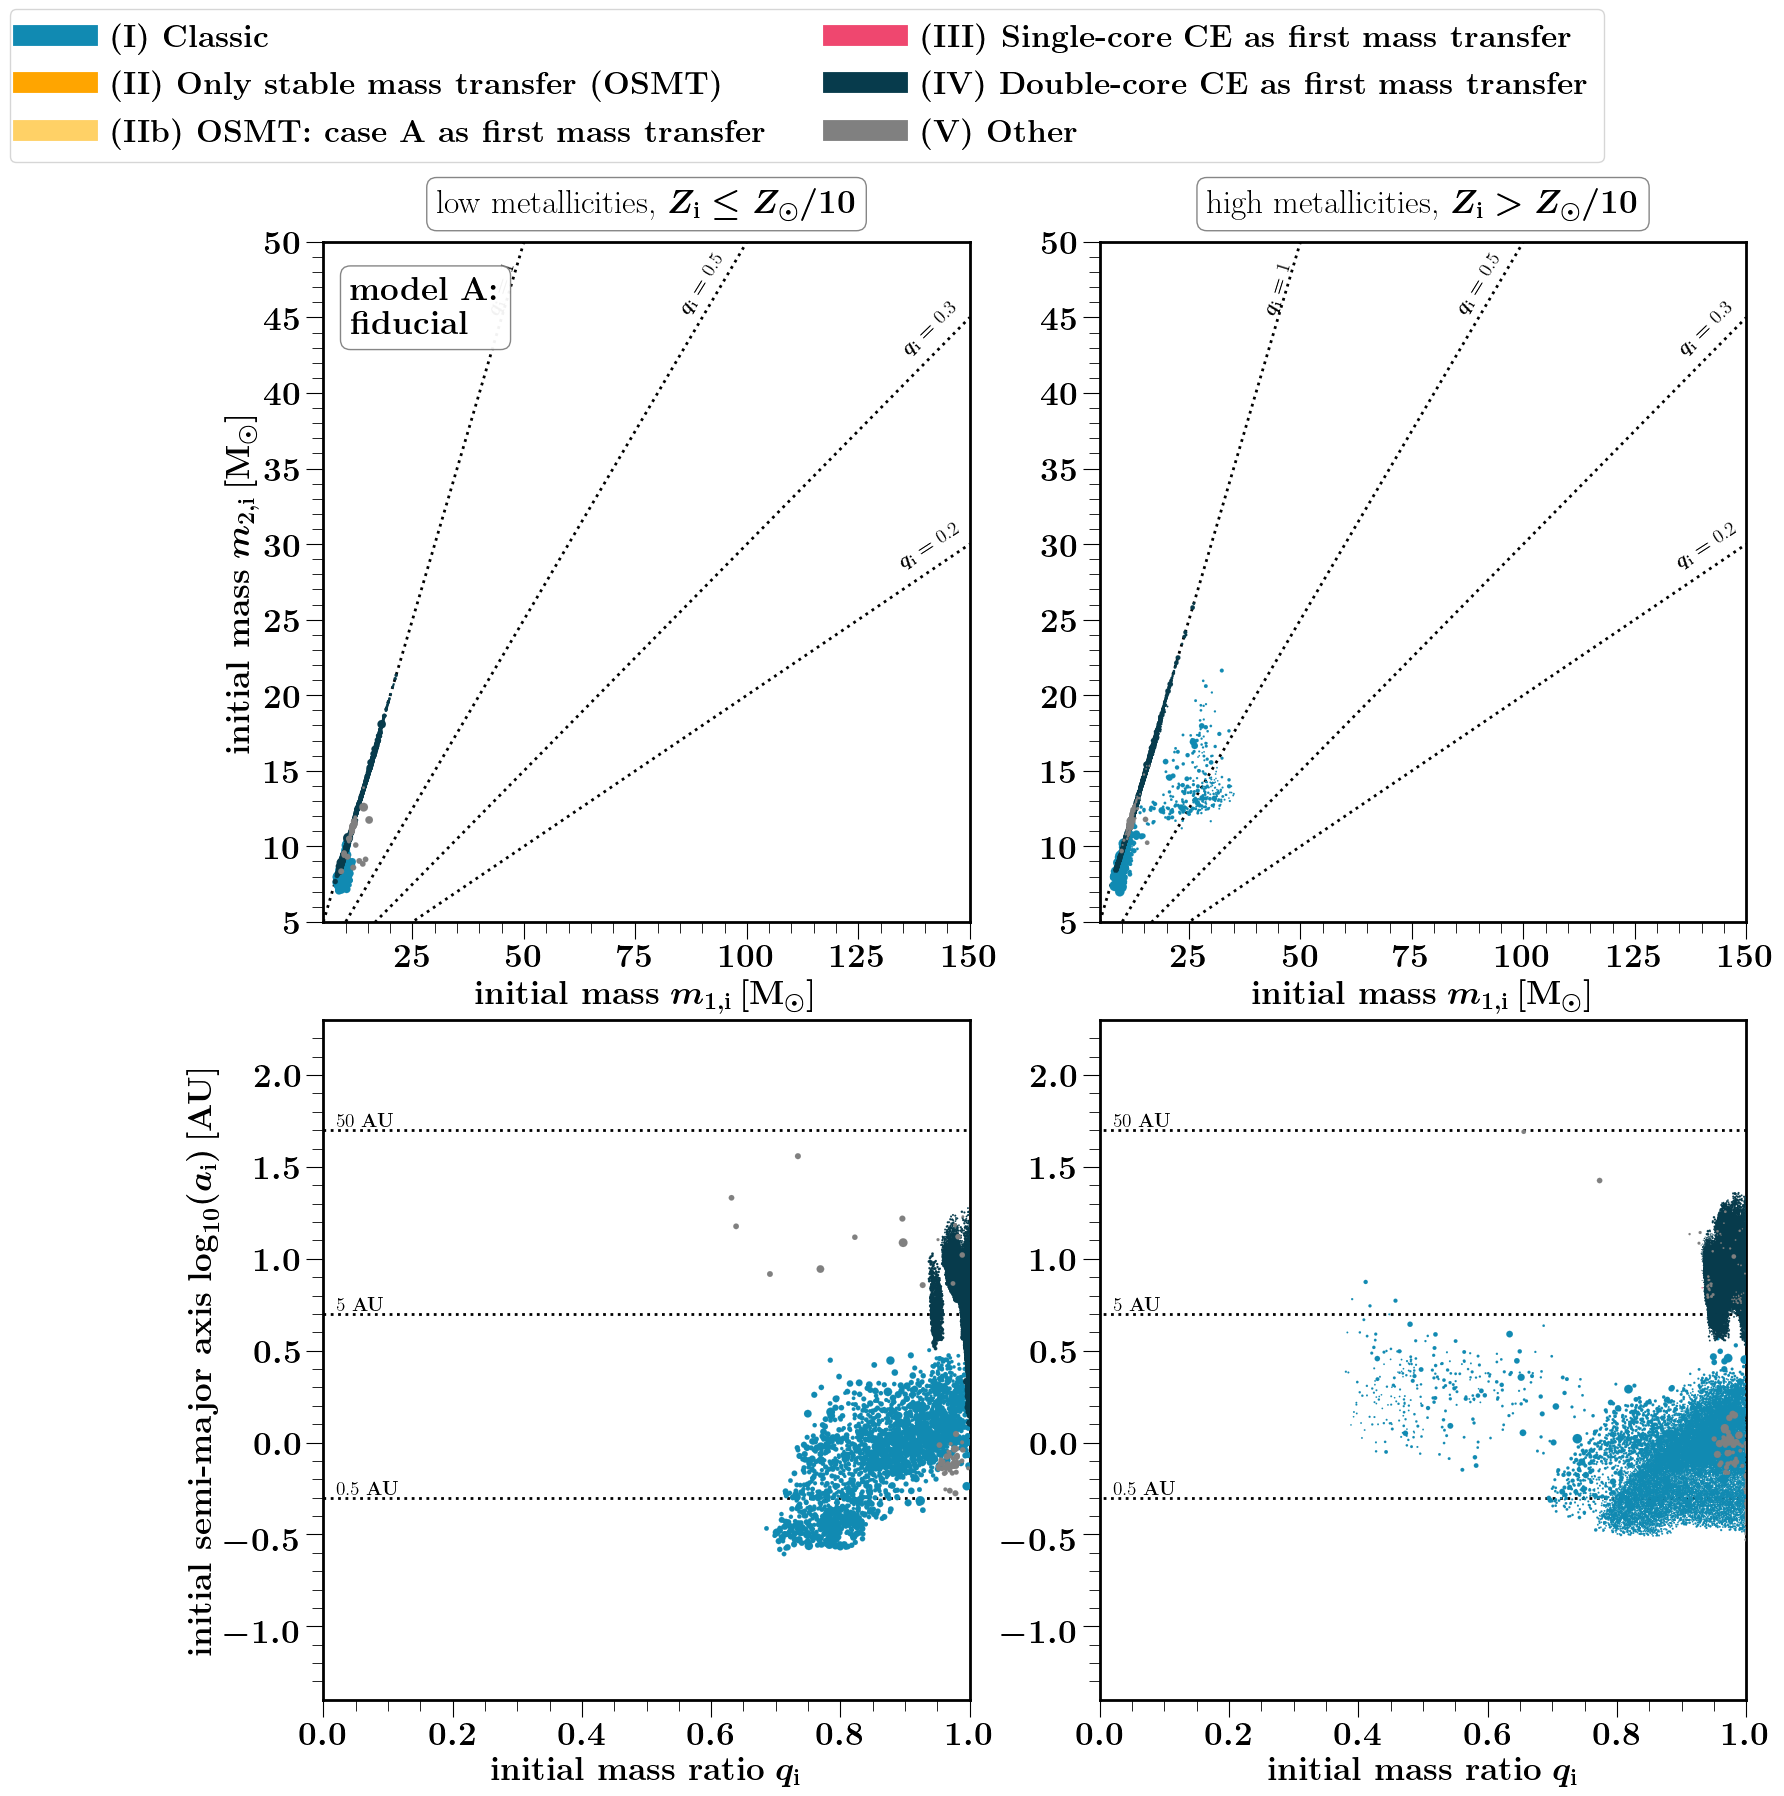

finished, figure is saved in the directory supplementary_material/

-----------------
now doing BPS model B, massTransferEfficiencyFixed_0_25
now making figure
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
41945 = # BHNS in this sub channel
41945 = # BHNS in this sub channel
41945 = # BHNS in this sub channel
41945 = # BHNS in this sub channel
41945 = # BHNS in this sub channel
41945 = # BHNS in this sub channel
now at z_ind = 1, 
41945 = # BHNS in this sub channel
41945 = # BHNS in this sub channel
41945 = # BHNS in this sub channel
41945 = # BHNS in this sub channel
41945 = # BHNS in this sub channel
41945 = # BHNS in this sub channel
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
now at z_ind = 1, 


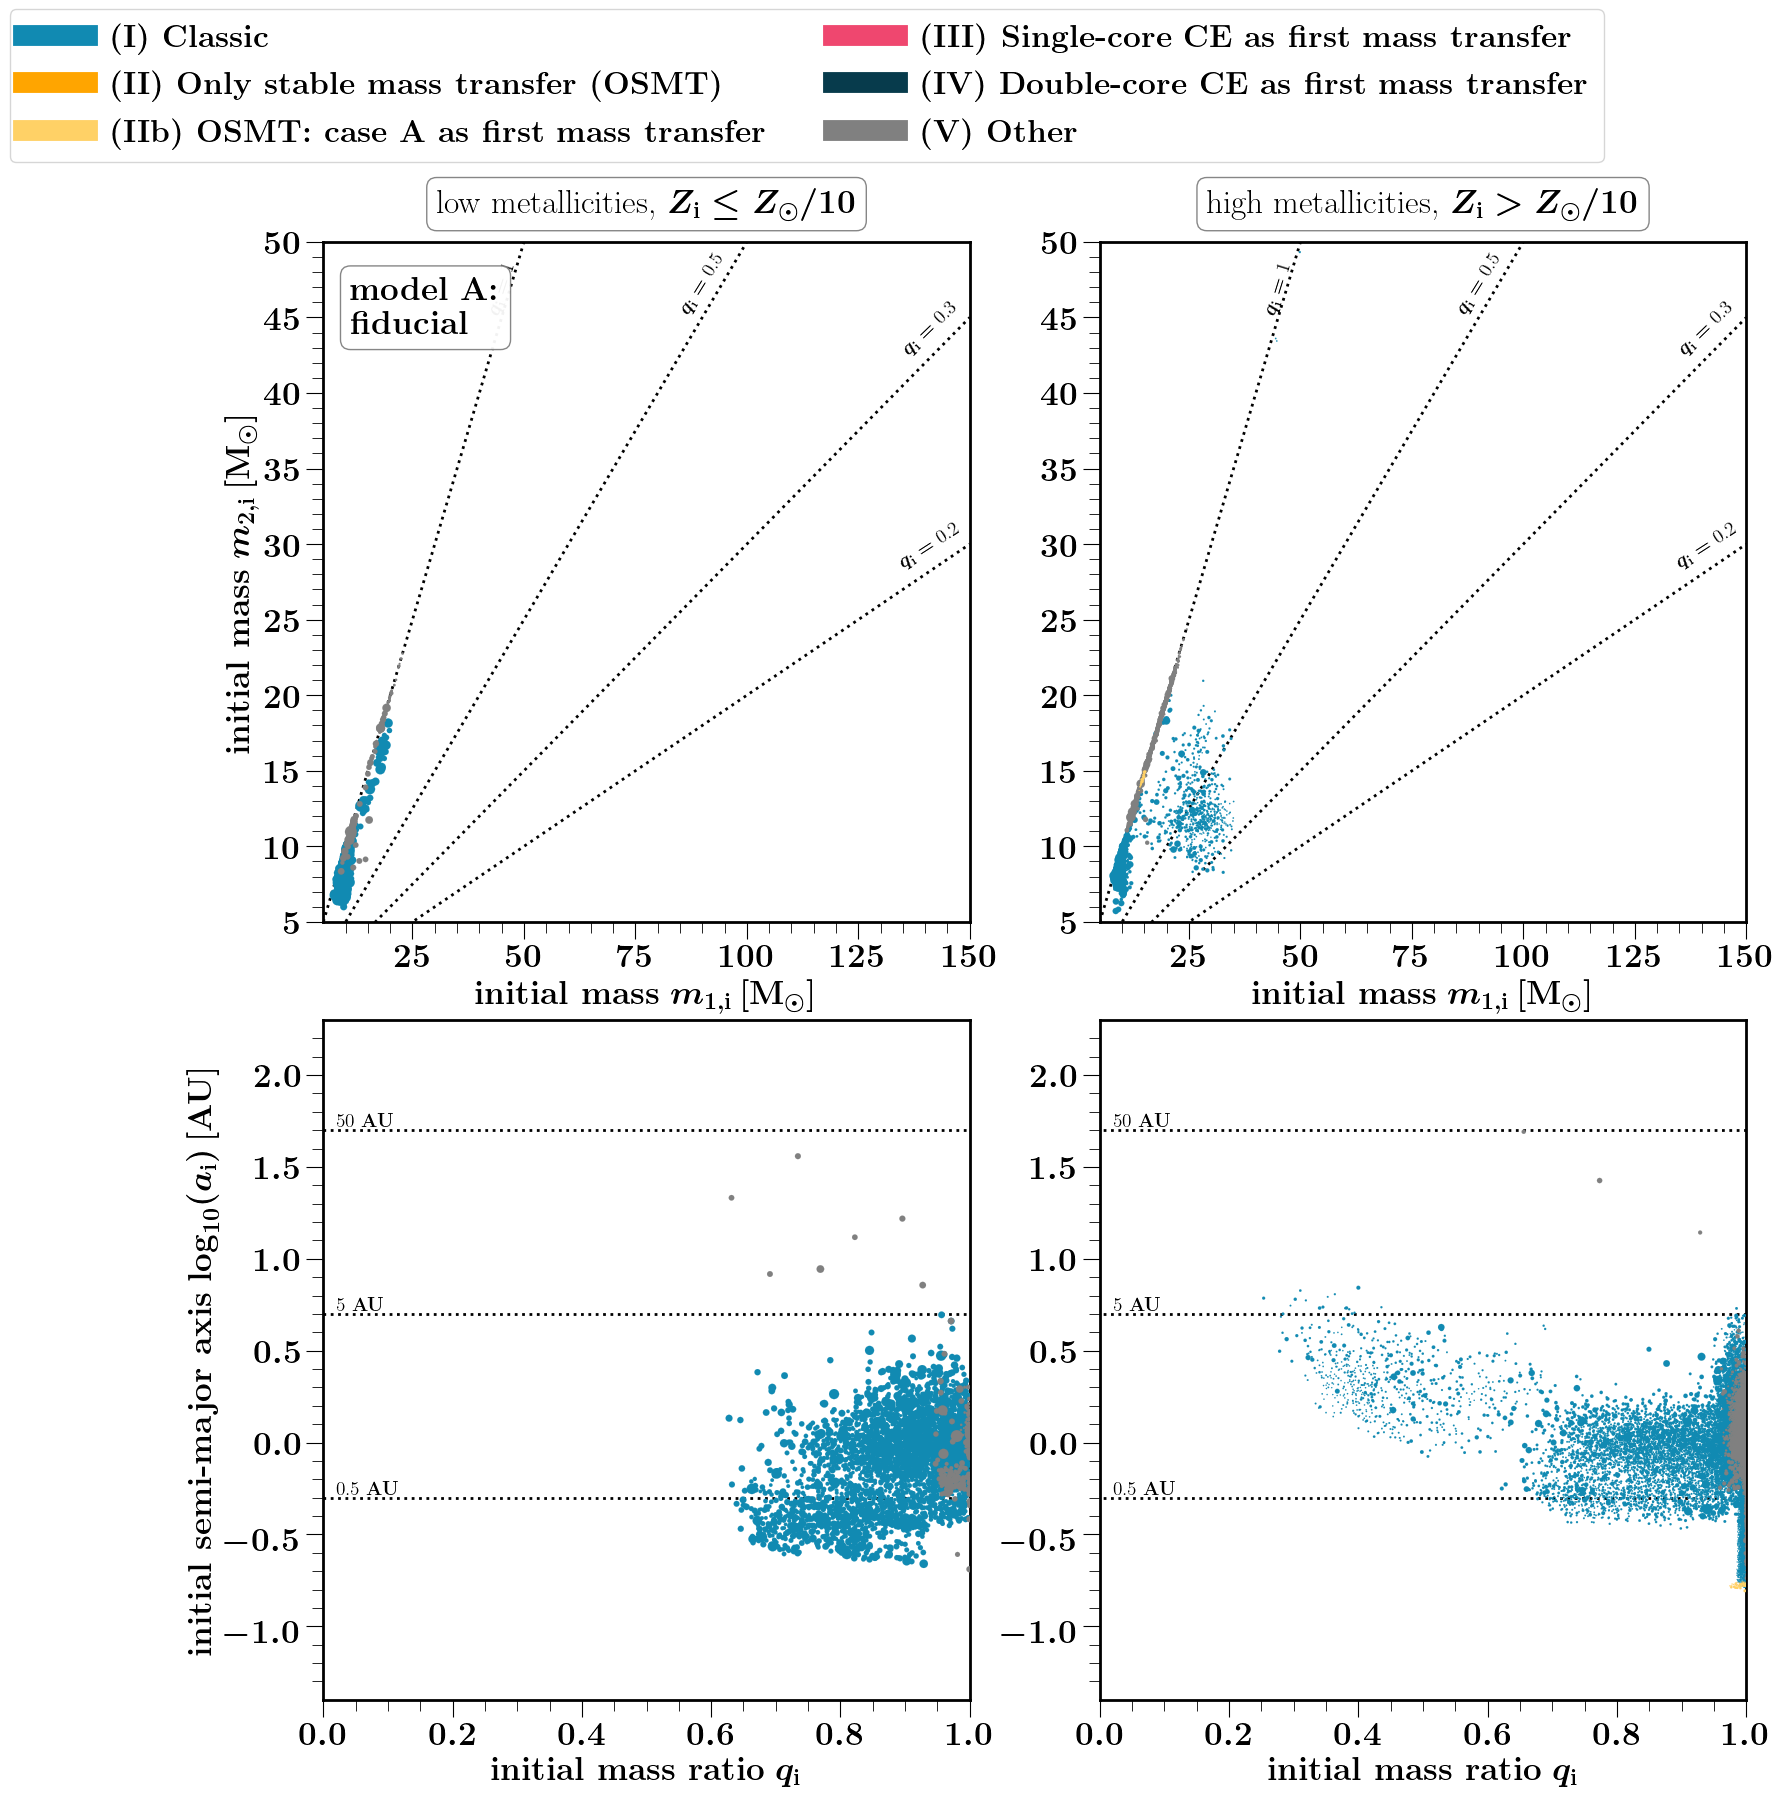

finished, figure is saved in the directory supplementary_material/

-----------------
now doing BPS model A, fiducial
now making figure
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
1521875 = # BHNS in this sub channel
1521875 = # BHNS in this sub channel
1521875 = # BHNS in this sub channel
1521875 = # BHNS in this sub channel
1521875 = # BHNS in this sub channel
1521875 = # BHNS in this sub channel
now at z_ind = 1, 
1521875 = # BHNS in this sub channel
1521875 = # BHNS in this sub channel
1521875 = # BHNS in this sub channel
1521875 = # BHNS in this sub channel
1521875 = # BHNS in this sub channel
1521875 = # BHNS in this sub channel
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
now at z_ind = 1, 


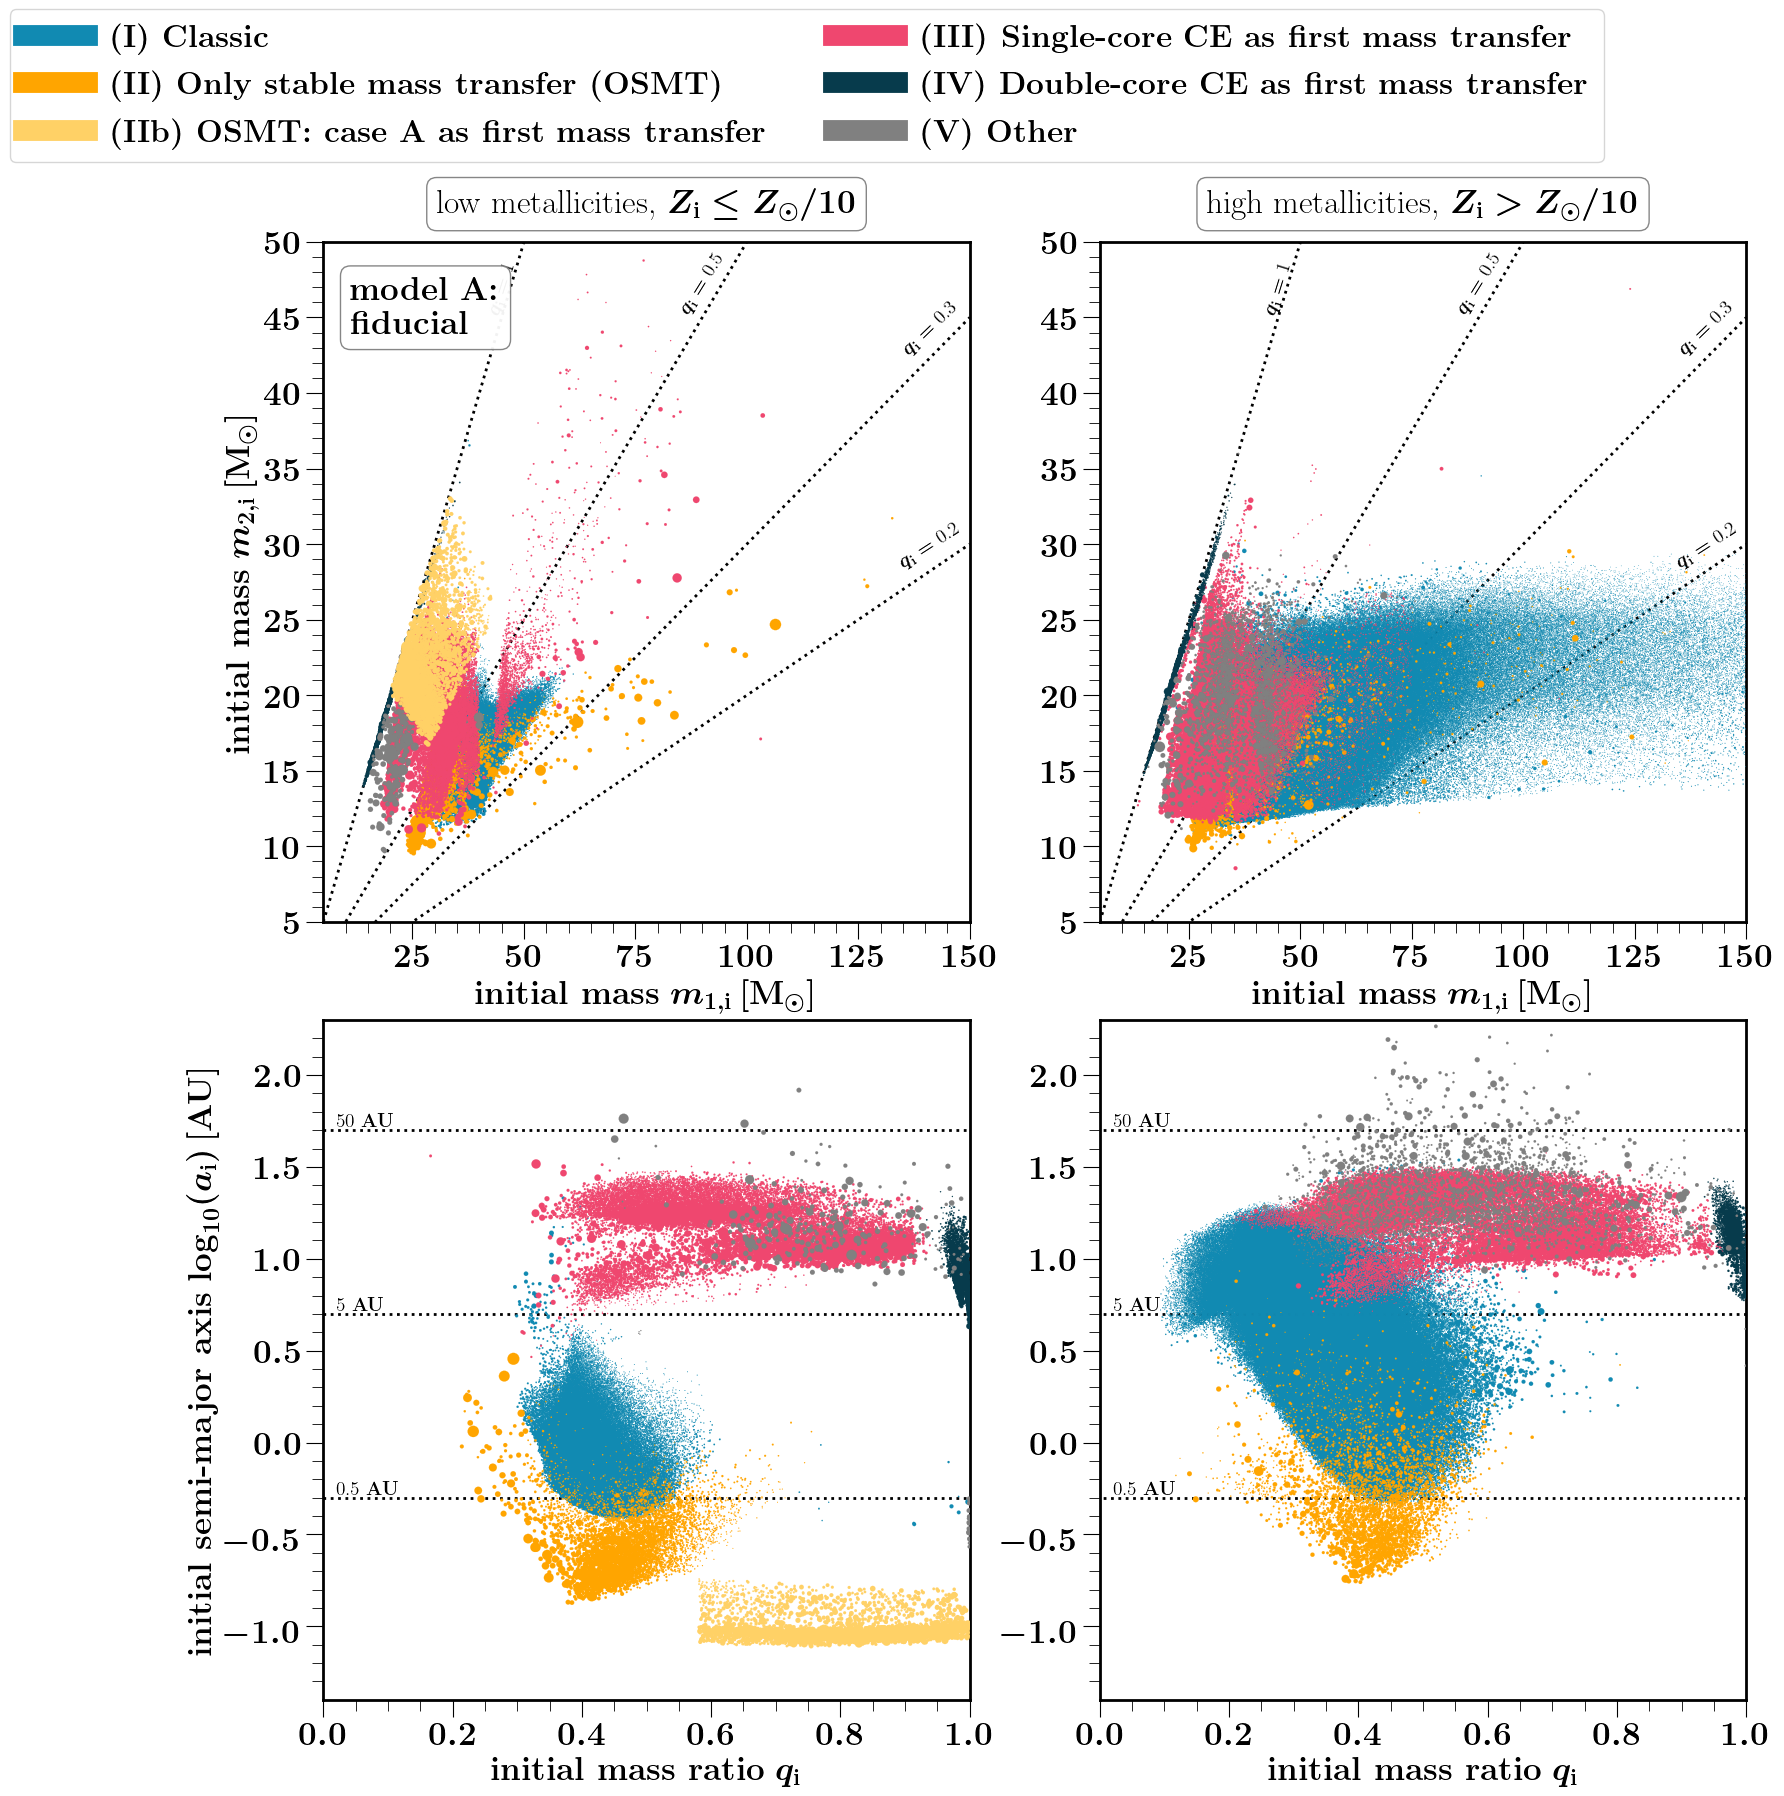

finished, figure is saved in the directory supplementary_material/

-----------------
now doing BPS model B, massTransferEfficiencyFixed_0_25
now making figure
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
738521 = # BHNS in this sub channel
738521 = # BHNS in this sub channel
738521 = # BHNS in this sub channel
738521 = # BHNS in this sub channel
738521 = # BHNS in this sub channel
738521 = # BHNS in this sub channel
now at z_ind = 1, 
738521 = # BHNS in this sub channel
738521 = # BHNS in this sub channel
738521 = # BHNS in this sub channel
738521 = # BHNS in this sub channel
738521 = # BHNS in this sub channel
738521 = # BHNS in this sub channel
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
now at z_ind = 1, 


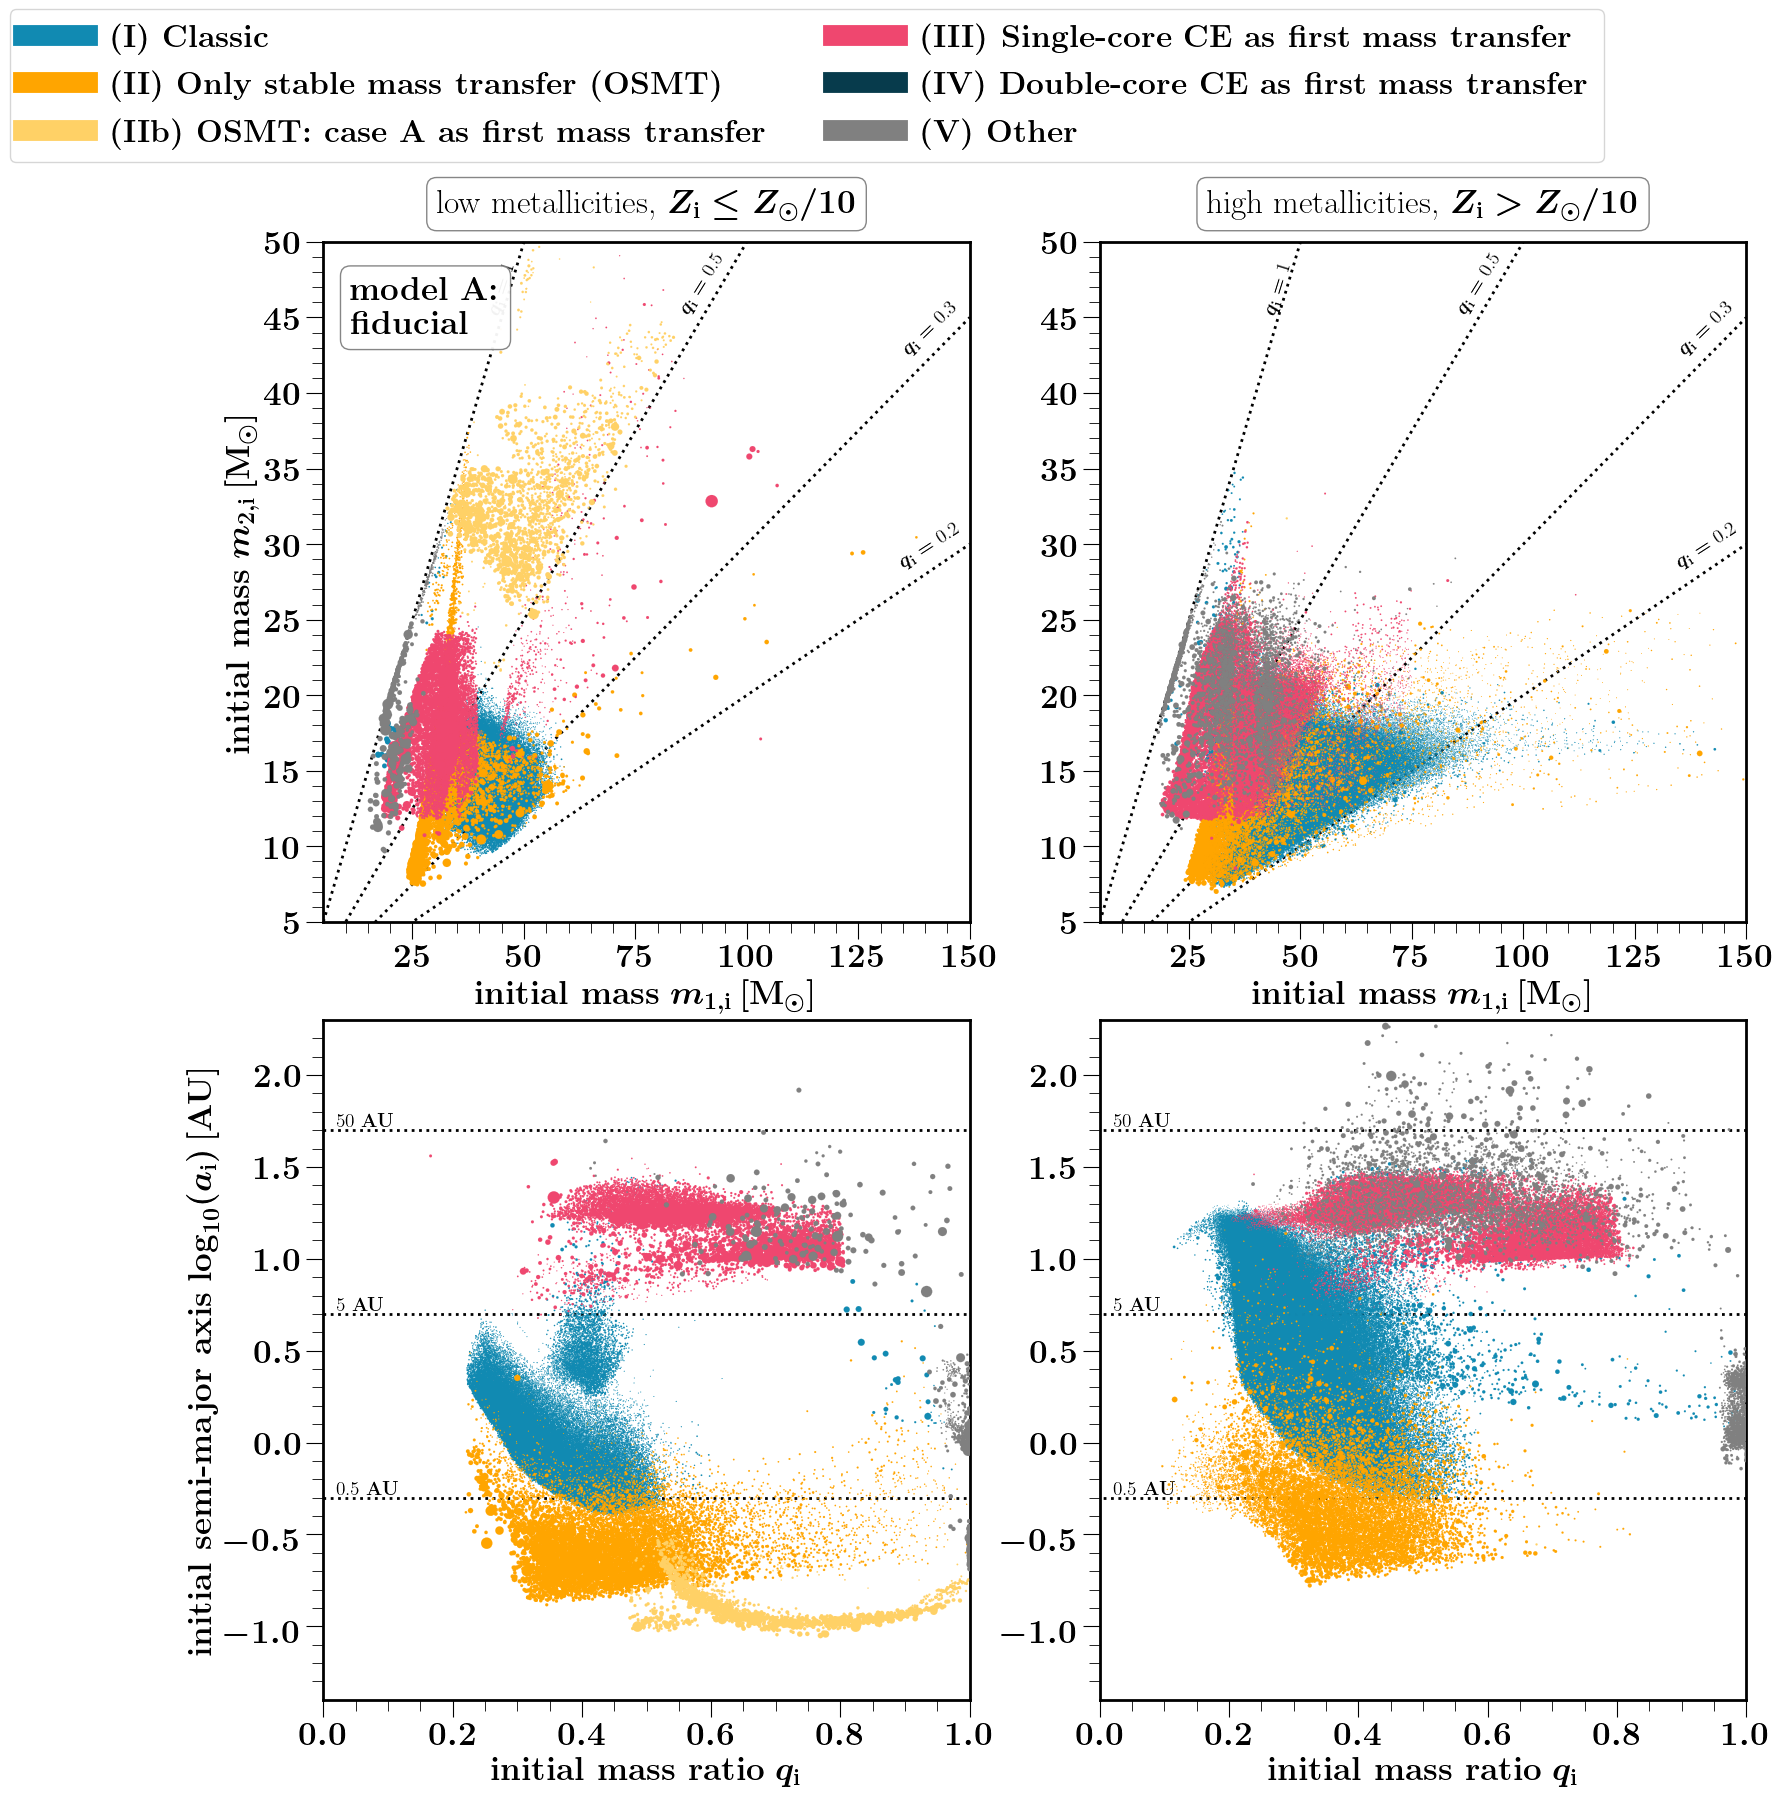

finished, figure is saved in the directory supplementary_material/

-----------------
now doing BPS model A, fiducial
now making figure
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
8362159 = # BHNS in this sub channel
8362159 = # BHNS in this sub channel
8362159 = # BHNS in this sub channel
8362159 = # BHNS in this sub channel
8362159 = # BHNS in this sub channel
8362159 = # BHNS in this sub channel
now at z_ind = 1, 
8362159 = # BHNS in this sub channel
8362159 = # BHNS in this sub channel
8362159 = # BHNS in this sub channel
8362159 = # BHNS in this sub channel
8362159 = # BHNS in this sub channel
8362159 = # BHNS in this sub channel
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
now at z_ind = 1, 


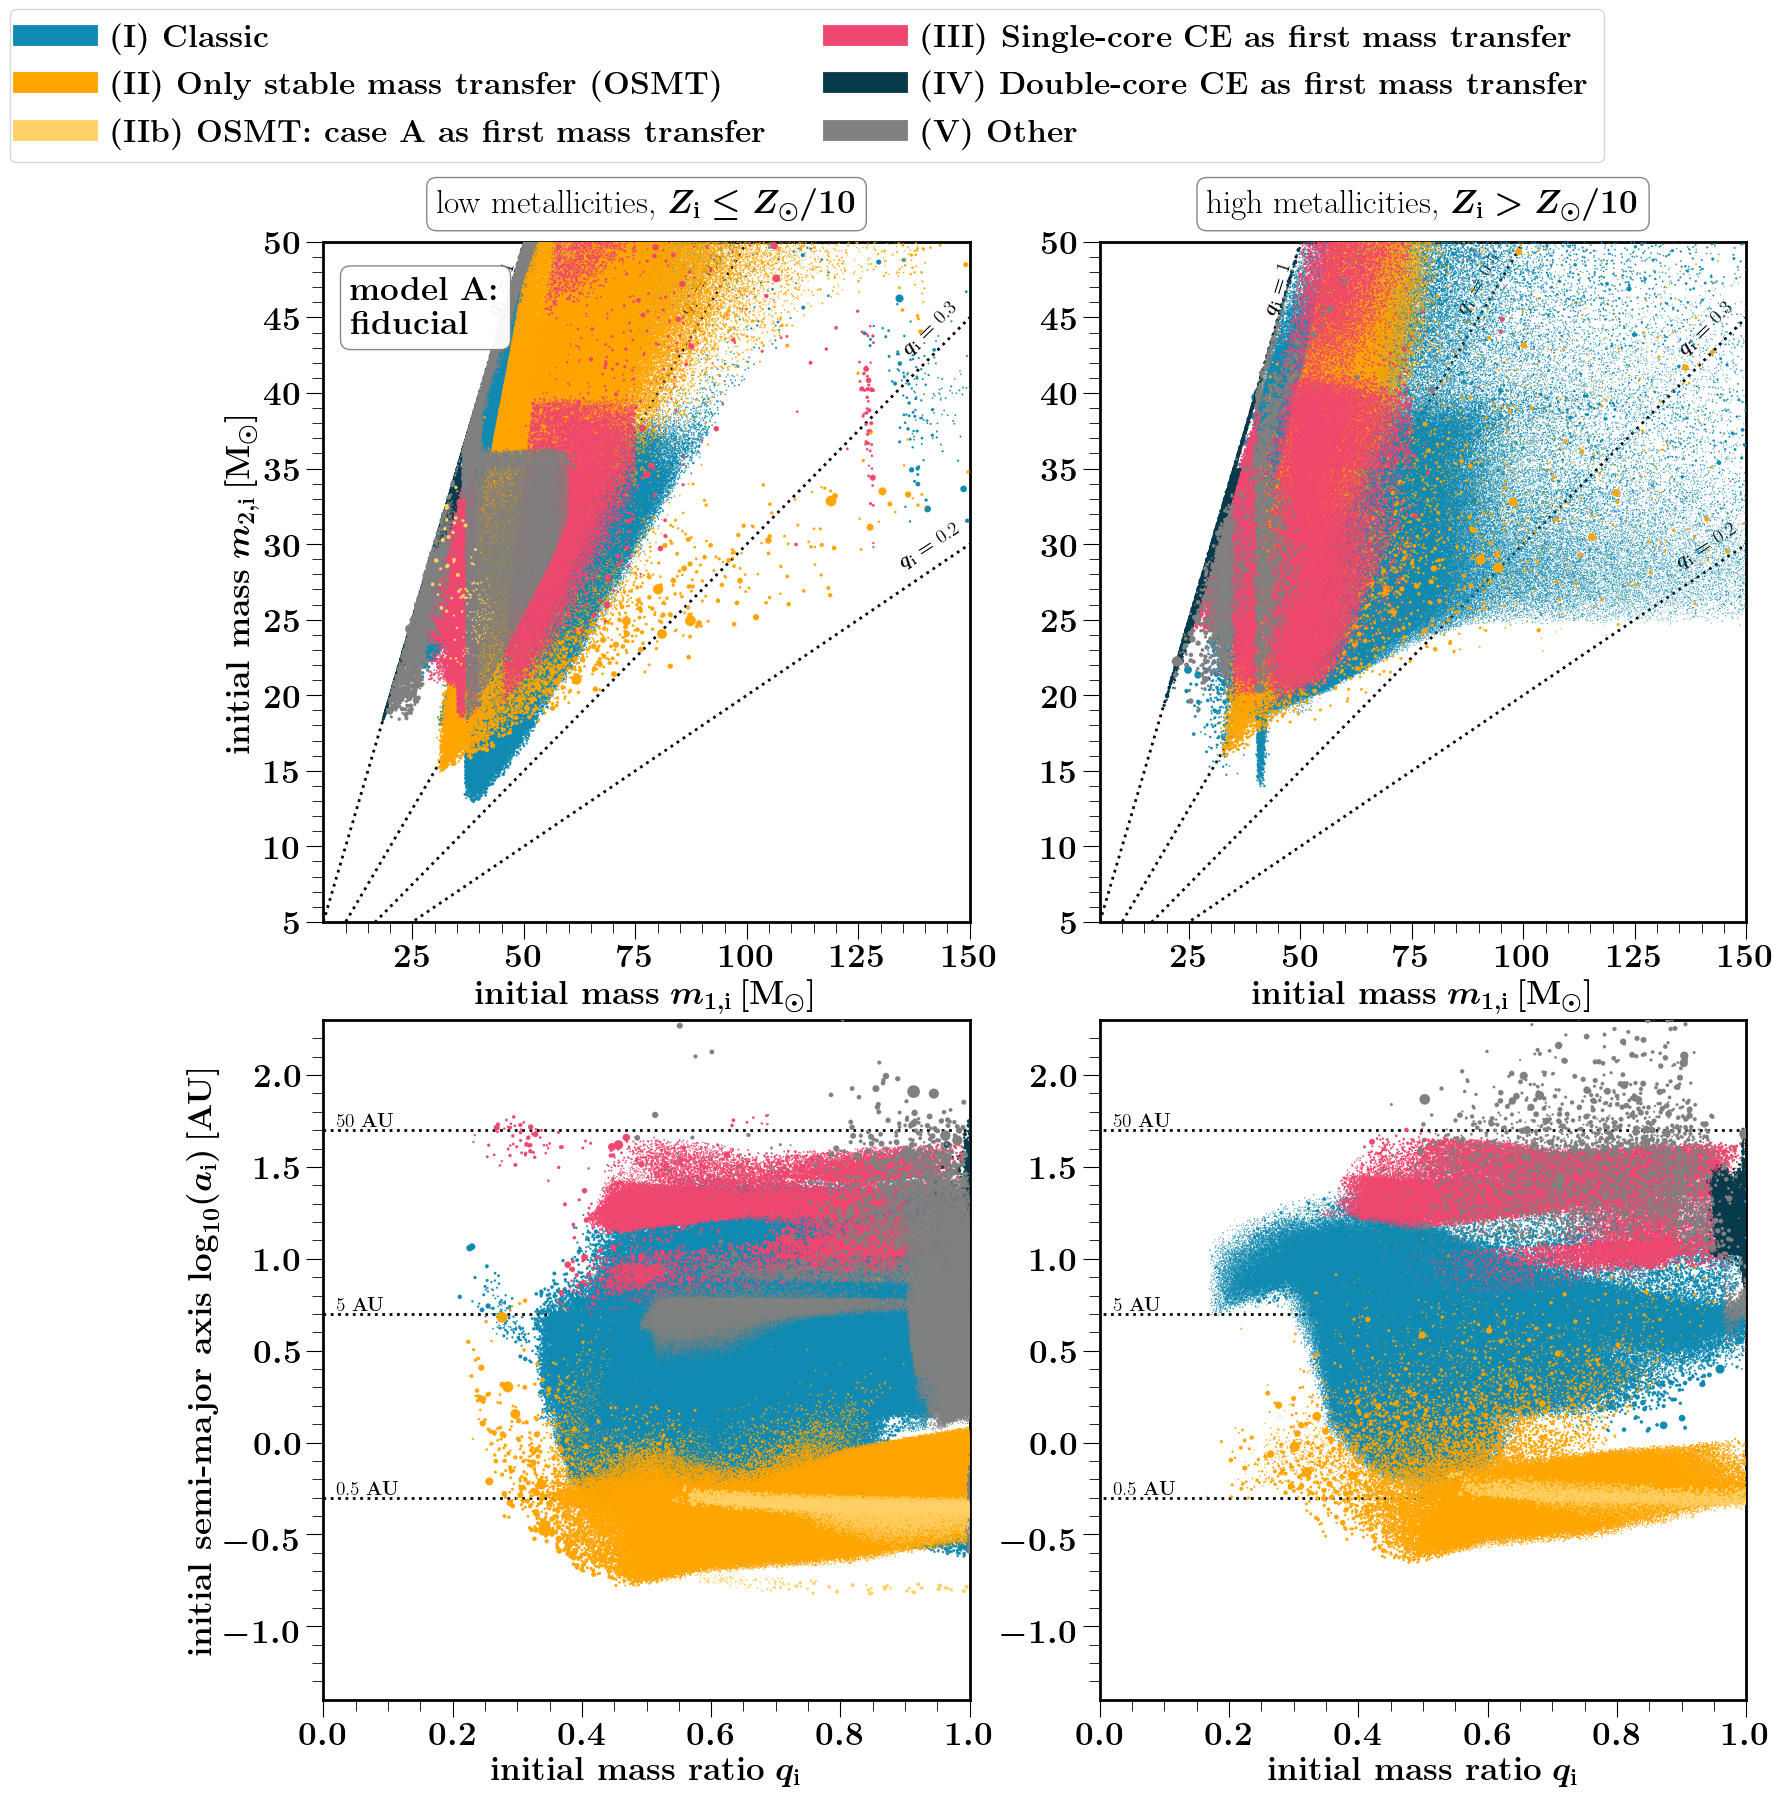

finished, figure is saved in the directory supplementary_material/

-----------------
now doing BPS model B, massTransferEfficiencyFixed_0_25
now making figure
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
8615524 = # BHNS in this sub channel
8615524 = # BHNS in this sub channel
8615524 = # BHNS in this sub channel
8615524 = # BHNS in this sub channel
8615524 = # BHNS in this sub channel
8615524 = # BHNS in this sub channel
now at z_ind = 1, 
8615524 = # BHNS in this sub channel
8615524 = # BHNS in this sub channel
8615524 = # BHNS in this sub channel
8615524 = # BHNS in this sub channel
8615524 = # BHNS in this sub channel
8615524 = # BHNS in this sub channel
running for channels ['classic', 'stable B no CEE', 'vii', 'immediate CE', 'double-core CE', 'other']
now at z_ind = 0, 
now at z_ind = 1, 


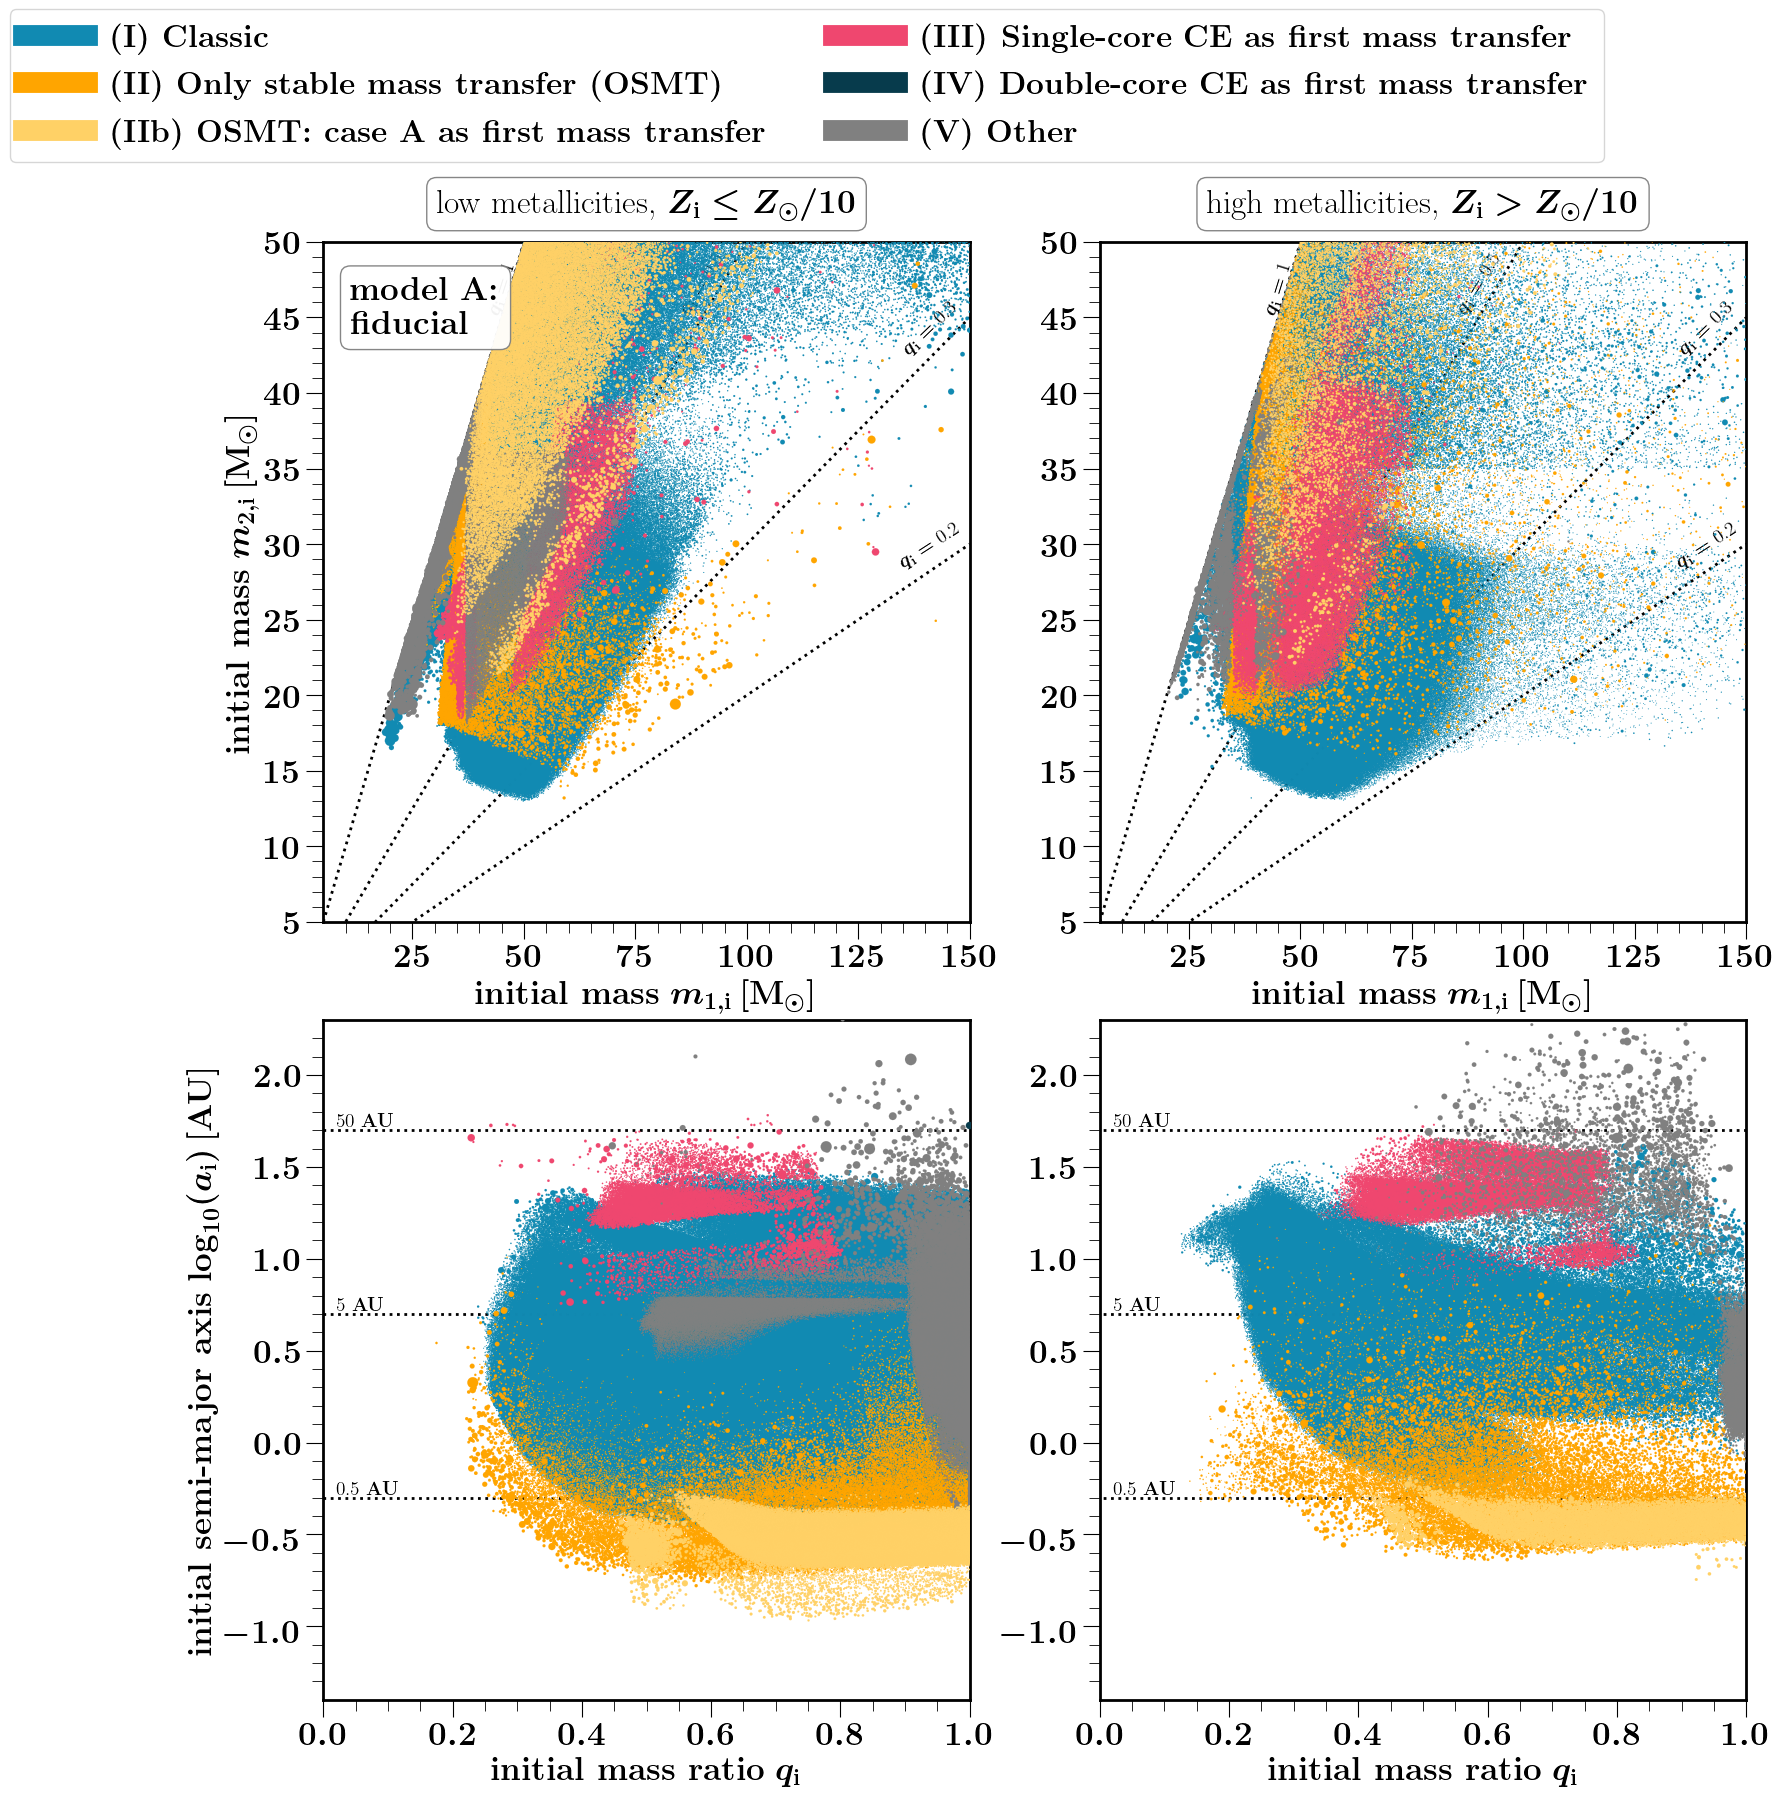

finished, figure is saved in the directory supplementary_material/


In [84]:
 # =




def plot_all(DCOtype='BHNS', pathData = '/Volumes/SimonsFoundation/DataDCO/'):
    DCOname = DCOname_dict[DCOtype]

    for ind_bps, bps_model in enumerate(BPSnameslist[:2]):

        BPSmodelName = bps_model
        print()
        print('-----------------')
        print('now doing BPS model %s, %s'%(bps_model, alphabetDirDict[bps_model]))





        # get fdata from path to this particularly bps file based on how I named the different models
        full_data_path = pathData + alphabetDirDict[BPSmodelName] +'/COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        fdata = h5.File(full_data_path,'r')     # read in data 



        # multiply weights with this no to obtain scatter point area size
        

        print('now making figure')


        f, ax= plt.subplots(ncols=2,nrows=2, figsize=(16,16), 
                          gridspec_kw={"width_ratios":[1.5, 1.5]})

        
        ## make legend 
        x__ = -100*np.ones(5)
        for _, channel in enumerate(['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other']): #'vii', 
            plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[channel])    
        lgd2 = f.legend(fontsize=fs-1, ncol=2,bbox_to_anchor=(.9, 1.124)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  



        #### PLOT SEPARATION AND MASS RATIO ###
        xlabel = r'\textbf{initial mass} $m_{1,{\rm{i}}} \, [\rm{M}_{\odot}]$'
        ylabel = r'\textbf{initial mass} $m_{2,{\rm{i}}} \, [\rm{M}_{\odot}]$'


        
        fc=None

        plotInitialMasses(ax=ax[0], fdata=fdata, DCOtype=DCOtype)
        
        



        # whether to plot labels text
        PlotText = False
        handles, labels = plotInitialqVSseparation(ax=ax[1], fdata=fdata, DCOtype=DCOtype)




        #####  ####

        # save and show 
        f.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5) 
        f.savefig('./supplementary_material/InitialParameters_'+ bps_model +'_'+DCOtype + '.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
        plt.show()
    #     plt.close()   
        fdata.close() 
        print('finished, figure is saved in the directory supplementary_material/')

plot_all(DCOtype='BNS') 

plot_all(DCOtype='BHNS')
plot_all(DCOtype='BBH') 

In [ ]:
gfsfd

In [42]:
#! mkdir supplementary_material/ 